#  <center>MOD 9.5 - Réseaux informatiques</center>
## <center style="color: #06A">BE 3 - Le protocole HTTP</center>

<center>__<b>Bouchafaa Mohamed Arezki | Guillerm Martin</b>__</center>

<h3 style="font-size:150%;color:white;background-color: #7fb2d4;padding:0.2em">A - Informations générales</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Déroulement de la séance.</h4>

Comme précédemment, le travail sera à effectuer par binôme. Le compte-rendu doit être rédigé
en complétant directement le présent notebook qui devra être déposé sur moodle une fois le travail terminé.

Avant de déposer le résultat de votre travail, merci de __mentionner vos noms au sein du document__, puis au moment du dépôt de bien vouloir nommer le fichier sous la forme :

<code>CR &lt;nom eleve 1> - &lt;nom eleve 2> - &lt;N° BE></code> 

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em">2. Objectif du travail demandé.</h4>

L'objectif du BE consiste à envoyer des requêtes HTTP vers des ressources diverses, de relever les réponses obtenues et de commenter ce que vous observez.

Pour cela, les fonctions <code>http_request</code> et <code>https_request</code> ci-dessous vont vous aider à envoyer une requête HTTP (resp. HTTPS) en Python depuis le notebook et à afficher le résultat obtenu :

In [2]:
import html
import http.client
from IPython.display import display, HTML, Image

def http_request(method, server, path, body=None, headers={}, port=80, silent=False):
    conn = http.client.HTTPConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def https_request(method, server, path, body=None, headers={}, port=443, silent=False):
    conn = http.client.HTTPSConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def send_request(conn, method, path, body=None, headers={}):
    conn.request(method, path, body, headers)
    return conn.getresponse()

def display_response(response,body):
    display_status_line(response)
    display_headers(response.headers)
    contentType = response.getheader('Content-Type')
    if contentType:
        if contentType.startswith('text') or contentType.startswith('application/json') or 'xml' in contentType:
            display_body(body.decode('UTF-8'), contentType)
        elif contentType.startswith('image'):
            display_body(body, contentType)
        else:
            display_error('Le notebook ne sait pas afficher le type de contenu {}'.format(contentType))
    return body


def display_error(msg):
    display_html(
        '<i style="margin-top:-0.4em; font-family:Consolas,monospace; ' +\
        'display:inline-block; margin-top:10px; color:#ccc">{}</i>',
        msg)

def display_status_line(response):
    display_html(
        "<code style='font-family:Consolas,monospace; display:block; margin-top: 5px; " +\
        "border-bottom:1px solid #ccc'><span style='font-weight:bold;color:#008'>{}</span> - {}</code>",
        response.status, response.reason)

def display_headers(headers):
    for h in headers:
        display_header(h,headers[h])

def display_header(header,value):
    display_html(
        "<code style='display:block; margin-top:-0.7em; font-family:Consolas,monospace'><b>{}:</b> {}</code>",
        header, value)
    
def display_body(body, contentType):
    preformatted = "<pre style='font-family:Consolas,monospace; padding:5px; " + \
        "border: 1px solid #ccc; border-radius:5px; box-shadow: 5px 5px 5px #ccc; " + \
        "margin:5px 0 10px 0; display: inline-block; min-width: 50%'>{}</pre>"
    freeformat = "<div style='padding:5px; border: 1px solid #ccc; border-radius:5px; " + \
        "box-shadow: 5px 5px 5px #ccc; margin:5px 0 10px 0; display: inline-block; " + \
        "min-width: 50%'>{}</div>"
    if ( len(body) ):
        if ( contentType.startswith('application/json') ) :
            display_html(preformatted, body)
        elif ( contentType.startswith('text/html') ) :
            display_html(freeformat, body)
        elif ( contentType == 'image/svg+xml') :
            display_html(freeformat, body)
        elif ( contentType.startswith('text/plain') ) :
            display_html(preformatted, html.escape(body))
        elif ( contentType.startswith('image') ) :
            display(Image(body))
    
def display_html(fmt,*args):
    display(HTML(fmt.format(*args)))

Voici comment utiliser la fonction <code>http_request()</code> pour effectuer une requête GET vers l'adresse http://httpbin.org/robots.txt :

In [3]:
http_request('GET','httpbin.org','/robots.txt')

Et voici comment effectuer une requête POST avec un corps :

In [4]:
https_request('POST','mod95-be3.onrender.com','/message', headers={
    'Content-Type': 'application/x-www-form-urlencoded'
}, body="pr%C3%A9nom=Raymond&nom=Deubaze&message=Bonjour D%C3%A9d%C3%A9+!")

<h3 style="font-size:150%;color:white;background-color:#7fb2d4;padding:0.2em">B - Travail à effectuer</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Exemples de requêtes HTTP</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.1]__ - Effectuer une requête vers la ressource <a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [7]:
https_request('GET','mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.2]__ - Comment peut-on obtenir uniquement les entêtes de cette même ressource ?
</div>

In [8]:
https_request('HEAD','mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.3]__ - Expliquer à quoi sert chacune des entêtes de la réponse que vous obtenez.
</div>

200 - OK: C'est le code de statut HTTP. "200" indique que la requête a été traitée avec succès et que le serveur a retourné  les données souhaitées.

Date : La date et l'heure auxquelles la réponse a été envoyée au format RFC 2822.

Content-Type: Le type de contenu de la réponse ici : "text/html; charset=UTF-8", ce qui signifie que le contenu est du HTML encodé en UTF-8.

Connection: L'état de la connexion, "keep-alive", indique que la connexion restera ouverte pour des requêtes futures.

CF-Ray : Un identifiant unique attribué à la requête par le réseau de Cloudflare, un service de performance et de sécurité pour les sites web.

CF-Cache-Status: Indique le statut du cache de Cloudflare, "DYNAMIC" signifie que la ressource n'est pas mise en cache.

Cache-Control : Instructions pour la mise en cache de la réponse. "public, max-age=0" signifie que la réponse peut être mise en cache mais doit être revalidée à chaque fois.

ETag: Un identifiant unique pour la version particulière du contenu retourné est utilisé pour la gestion du cache.

Last-Modified: La date et l'heure de la dernière modification du contenu.

Vary: Indique que le contenu retourné peut varier en fonction de l'en-tête "Accept-Encoding", qui est lié à la compression du contenu.

rndr-id: Un identifiant unique attribué au serveur ou au service qui a traité la requête

x-powered-by: Indique le logiciel ou le framework utilisé par le serveur, ici "Express" (un framework pour applications web en Node.js).

x-render-origin-server: Informations spécifiques au serveur qui a généré la réponse.

Server: Le logiciel serveur utilisé, ici "cloudflare", indiquant que la réponse a transité par le réseau Cloudflare.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.4]__ - Observer maintenant les entêtes obtenues en accédant à <a href="http://dmolinarius.github.io/demofiles/mod-95/be-http/hello.html">hello.html</a>.<br>
Il s'agit d'un document ayant le même contenu que le précédent, mais hébergé sur un serveur différent.
</div>

In [9]:
https_request('HEAD','dmolinarius.github.io','/demofiles/mod-95/be-http/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.5]__ - Expliquer à quoi servent chacune des nouvelles entêtes de la réponse que vous obtenez.<br>
A quoi correspondent les entêtes dont le nom commence par X- ?
</div>
<!-- cf. https://stackoverflow.com/questions/3561381/custom-http-headers-naming-conventions -->

Content-Length: La longueur du contenu de la réponse en octets, ici 181 octets.

permissions-policy: Une directive de sécurité qui permet au serveur de contrôler les fonctionnalités du contenu. "interest-cohort=()" désactive une fonctionnalité de suivi utilisateur spécifique.

Access-Control-Allow-Origin: Spécifie les origines autorisées à accéder à la ressource. "*" signifie que n'importe quelle origine peut y accéder.

expires: La date et l'heure d'expiration du contenu dans le cache.

x-proxy-cache: Indique le statut du cache sur un proxy intermédiaire, "MISS" signifie que la réponse n'était pas dans le cache du proxy.

X-GitHub-Request-Id: Un identifiant unique pour la requête spécifique, utilisé pour le débogage et le suivi chez GitHub.

Accept-Ranges: Indique que le serveur accepte des requêtes partielles pour ce contenu, ici "bytes" signifie que des plages d'octets peuvent être demandées.

Via: Indique que la requête a transité par un serveur intermédiaire, ici un serveur Varnish Cache.

Age: Le temps en secondes depuis la mise en cache de la réponse, ici 0 signifiant qu'elle vient d'être mise en cache.

X-Served-By: Identifie le serveur de cache spécifique qui a traité la requête.

X-Cache: Le statut du cache sur le serveur de cache, "MISS" indique que la réponse n'était pas dans le cache.

X-Cache-Hits: Le nombre de fois que le contenu a été servi depuis le cache, ici 0.

X-Timer: Des informations de chronométrage pour la requête, utiles pour le débogage.

Vary: Indique que le contenu retourné peut varier en fonction de l'en-tête "Accept-Encoding", qui est lié à la compression du contenu.

On peut d'ailleurs noter que les en-têtes dont le nom commence par "X-" sont des en-têtes personnalisés ou non standard. Ils ne font pas partie de la spécification officielle des en-têtes HTTP.

<h4 style="font-size:150%;color:#06a;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">2. Divers types de ressources.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.1]__ - Effectuer maintenant une requête vers la ressource
<a href="https://mod95-be3.onrender.com/hello.txt">hello.txt</a> et observer les entêtes obtenues.<br>
Comparer les codes source des deux documents, puis expliciter l'ensemble des similitudes et des différences avec les entêtes correspondant à
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [5]:
https_request('GET','mod95-be3.onrender.com','/hello.txt')

https_request('GET','mod95-be3.onrender.com','/hello.html')

La différence majeure est le Content-Type: hello.txt est indiqué comme "text/plain; charset=UTF-8", mais le contenu reçu est en fait du HTML. Cela pourrait être une erreur de serveur ou une mauvaise configuration. Dans le second cas, il est indqué comme text/html, la aucun problème.

Une autre différence est le rndr-id. Les autres attributs sont similaires entre les deux ressoruces.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.2]__ - Visualiser ces deux ressources à l'aide d'un navigateur et noter la différence (s'il n'y en a pas, changer de navigateur). Commenter.
</div>

En accédant à l'URL https://mod95-be3.onrender.com/hello.txton obtient le "code" html de la page hello avec les balises correponsant au head du html, le doctype meta charset etc.. et le body du code html. 

En accédant à l'URL https://mod95-be3.onrender.com/hello.html on obtient la page hello mais cette fois ci avec le style correspondant et en voyant uniquement le body du html (sans les balises biensur).

La différence majeure est dans le Content-Type et le Transfer-Encoding. Il est surprenant que hello.txt ait un en-tête indiquant "text/plain" alors que le contenu est clairement du HTML. Cela suggère une incohérence entre l'en-tête et le contenu réel d'où le fait qu'on observe un code "brut".

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.3]__ - Effectuer les requêtes permettant d'obtenir les ressources
<a href="https://mod95-be3.onrender.com/file1.html">file1.html</a>,
<a href="https://mod95-be3.onrender.com/file2.html">file2.html</a>,
<a href="https://mod95-be3.onrender.com/file3.html">file3.html</a>,
 et essayez de les ouvrir directement dans votre navigateur.<br>
Commenter ce que vous observez et les réponses obtenues, en indiquant notamment quel est le type respectif de chacune de ces ressources et comment les navigateurs les affichent. Préciser comment fait le navigateur pour savoir comment afficher chacune de ces ressources, et donner votre avis sur la pertinence de la démarche qui consisterait à essayer d'inférer le type d'une ressource à partir de son URL.

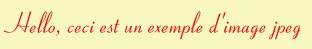

In [6]:
https_request('GET','mod95-be3.onrender.com','/file1.html')

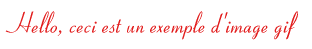

In [7]:
https_request('GET','mod95-be3.onrender.com','/file2.html')

In [8]:
https_request('GET','mod95-be3.onrender.com','/file3.html')

### Les lignes issues de la requete GET : 

Les lignes différentes par rapport à lorsque la requete se faisait sur hello
html sont : 

Content-Type: image/jpeg: Cette ligne indique que le type de contenu de la réponse est une image JPEG. C'est différent de hello.html, où le type de contenu était soit du texte brut (text/plain) soit du HTML (text/html).

Content-Length: 3053: Cette ligne indique la longueur du contenu de la réponse en octets. Elle est spécifique à cette réponse car la taille du contenu (une image JPEG dans ce cas) est différente de celle des fichiers HTML précédemment mentionnés. La présence de cette ligne indique également que la réponse n'est pas transmise en morceaux (Transfer-Encoding: chunked).

### Ouvrir les file sur navigateur 

en ouvrant file1.html sur navigateur on obtient une image jpeg où il y'a écrit "Hello ceci est un exemple de jpeg", en ouvrant file1.html on obtient bien un gif où il y'a écrit "Hello ceci est un exemple de gif" cependant en ouvrant file3.html on ouvre un pdf où il y'a écrit ceci est un exemple de PDF, ou sur certains navigateurs on télécharge ce-dit PDF. 

Cette expérience montre bien que le client est agnostique de l'extension du fichier requetté (.html ici). En effet le client se base sur le content-type dans le header pour définir quel est le type du fichier qu'il reçoit.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">3. Requêtes conditionnelles.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.1]__ - Afin de faciliter la gestion des caches, HTTP/1.0 possède la directive Last-Modified, tandis que HTTP/1.1 a introduit la notion d'Etag. Noter la date de dernière modification et l'Etag de la ressource
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [18]:
https_request('GET','mod95-be3.onrender.com','/hello.html')

Last-Modified: Tue, 02 May 2023 16:38:12 GMT

ETag: W/"b6-187dd542520"

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.2]__ - Effectuer une requête GET conditionnelle vers cette même ressource, dont la directive If-Modified-Since correspond à la date de dernière modification du document. En effectuer une autre avec une date antérieure. Commenter les résultats observés et conclure sur le fonctionnement et l'utilité de cette directive.
</div>

In [26]:
https_request('GET','mod95-be3.onrender.com','/hello.html',headers={
    'If-modified-Since': 'Tue, 02 May 2023 16:38:12 GMT'
})

In [23]:
https_request('GET','mod95-be3.onrender.com','/hello.html',headers={
    'If-modified-Since': 'Mon, 01 May 2023 16:38:12 GMT'
})

Lorsqu'il n'y a pas eu de modification depuis "Last modified", le statut du fichier devient : "304 - Not Modified". Cela évite notamment de recharger inutilement le fichier.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.3]__ - Effectuer le même exercice avec une requête conditionnelle basée sur l'Etag. A votre avis, pourquoi y a-t-il eu cette nouvelle possibilité en HTTP/1.1 ?
</div>

In [22]:
https_request('GET','mod95-be3.onrender.com','/hello.html',headers={
    'If-None-Match': 'W/"b6-187dd542520"'
})

In [24]:
https_request('GET','mod95-be3.onrender.com','/hello.html',headers={
    'If-None-Match': 'W/"b6-187dd542510"'
})

l'Etag permet d'avoir une réponse intelligente au problème. Se reposer sur le last modified ne permet pas de traiter les problèmes liés à des fichiers non statiques. Par exemple des fichiers générés pour un utilisateur en interrogeant la base de données. Si la base de donnée n'a pas changé alors les fichiers générés sont les mêmes mais le last-modified aura changé. l'Etag permet de répondre à cette problématique.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">4. Redirections.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.1]__ - Examiner la réponse obtenue lors d'une requête vers 
<a href="https://mod95-be3.onrender.com/moved">cette ressource</a> et décrire le comportement
d'un navigateur lorsqu'il reçoit ce type de réponse.<br>
<em>-- attention, il y a éventuellement un piège --</em>
</div>

In [27]:
https_request('GET','mod95-be3.onrender.com','/moved')

En cliquant sur le lien https://mod95-be3.onrender.com/moved on est redirigé vers le site d'accueil de Centrale Lyon. 

Lorsqu'un navigateur reçoit une réponse HTTP avec un code de statut 301 - Moved Permanently, cela indique que la ressource demandée a été déplacée de façon permanente vers une nouvelle URL. Voici comment le navigateur traite ce type de réponse :

Interprétation du Code de Statut 301 : Le navigateur comprend que l'URL de la ressource demandée a changé de manière permanente.

En-tête Location : L'en-tête Location dans la réponse fournit la nouvelle URL de la ressource. Dans cet exemple, l'en-tête Location indique http://www.ec-lyon.fr. C'est la nouvelle adresse à laquelle le navigateur doit accéder pour obtenir la ressource.

Redirection Automatique : Le navigateur redirige automatiquement l'utilisateur vers la nouvelle URL spécifiée dans l'en-tête Location. Cette redirection se fait sans intervention de l'utilisateur, créant une expérience de navigation fluide.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.2]__ - Essayer maintenant
<a href="https://mod95-be3.onrender.com/perm">cette nouvelle ressource</a>. Quelle sont les différences avec la précédente ? Consulter par exemple la <a href="https://en.wikipedia.org/wiki/List_of_HTTP_status_codes#4xx_Client_errors">liste des statuts HTTP</a> et préciser en quoi le comportement attendu des clients est différent.
</div>

In [28]:
https_request('GET','mod95-be3.onrender.com','/perm')

#Réponse de la requete HTTP : 

réponse HTTP avec un code de statut 308 - Permanent Redirect est similaire dans son objectif au code 301 - Moved Permanently, mais avec quelques différences clés dans son comportement.

308 - Permanent Redirect: Ce code de statut indique que la ressource demandée a été déplacée de manière permanente vers une nouvelle URL, tout comme le code 301. Cependant, la différence principale est que 308 exige que la méthode de requête (par exemple, GET, POST) et les corps de requête soient préservés lors de la redirection, ce qui n'est pas exigé par 301.

### Comportement du Navigateur avec 308

Préservation de la Méthode de Requête et du Corps de Requête: Si la requête initiale était un POST avec un certain corps de données, par exemple, la requête redirigée sera également un POST avec le même corps de données.

Redirection Automatique: Comme avec 301, le navigateur redirige automatiquement l'utilisateur vers la nouvelle URL spécifiée dans l'en-tête Location, sans action requise de la part de l'utilisateur.

Cache de la Redirection: Cette redirection sera également mise en cache pour éviter des requêtes répétitives au serveur d'origine, à chaque requete sur l'URL de départ le client passera directement à la "bonne" URL qu'il a en cache.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.3]__ - Ce type de redirection est utilisé par les raccourcisseurs d'URLs. Vérifier ceci en envoyant une requête
vers la ressource <a href="http://bit.ly/2Oz8wbC">http://bit.ly/2Oz8wbC</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [29]:
http_request('GET','bit.ly','/2Oz8wbC')

On peut ajouter d'autres informations quant au statut 301 notamment : 

- Permanence de la Redirection : Les raccourcisseurs d'URL ont pour but de créer des liens stables et permanents qui redirigeront toujours vers la même destination. Un code 301 indique que la redirection n'est pas temporaire et que l'URL raccourcie restera valide à long terme.

- Mise à jour des Liens : Les utilisateurs et les moteurs de recherche sont encouragés à mettre à jour leurs liens ou favoris avec l'URL de destination, puisque le code 301 indique un changement d'adresse permanent.

- Efficacité et Performance : En utilisant un 301, les raccourcisseurs d'URL garantissent que les navigateurs et les moteurs de recherche mettront en cache la redirection. Cela signifie que les requêtes futures vers la même URL raccourcie seront redirigées plus rapidement, car le navigateur se souviendra de la destination finale.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.4]__ - Voici encore
<a href="https://mod95-be3.onrender.com/found">une ressource</a> et
<a href="https://mod95-be3.onrender.com/temp">une dernière</a>
effectuant chacune une redirection. En vous référant encore une fois à la documentation, expliquer les différences de comportement attendues de la part d'un client recevant chacune de ces réponses, l'une par rapport à l'autre, puis par rapport aux deux codes de redirection observés précédemment.
</div>

In [30]:
https_request('GET','mod95-be3.onrender.com','/found')

On obtient un code de statut HTTP 302, également connu sous le nom de 302 Moved Temporarily, est utilisé pour indiquer une redirection temporaire d'une URL. Contrairement à un 301 Moved Permanently, un 302 n'indique pas un changement permanent de l'URL.

Fonctionnement du Code de Statut 302 Redirection Temporaire : Lorsqu'un serveur renvoie un 302, il informe le client que la ressource demandée est temporairement disponible à une autre URL. Cette redirection est considérée comme temporaire, ce qui signifie que l'URL originale est toujours considérée comme valide.

En-tête Location : Tout comme avec les autres types de redirections, un 302 est accompagné d'un en-tête Location qui indique l'URL temporaire où la ressource peut être trouvée. Le navigateur redirige automatiquement l'utilisateur vers cette nouvelle URL.

Conservation de la Méthode de Requête : Normalement, la méthode de la requête (comme GET ou POST) est conservée lors de la redirection.

In [31]:
https_request('GET','mod95-be3.onrender.com','/temp')

Le code de statut HTTP 307 Temporary Redirect est utilisé pour indiquer qu'une ressource demandée a été temporairement déplacée vers une autre URL, avec la particularité de préserver la méthode HTTP originale (comme GET ou POST) lors de la redirection. Contrairement au 302 Found, où certains navigateurs peuvent changer une requête POST en GET, un 307 garantit que la méthode et le corps de la requête restent inchangés lors du suivi de la redirection. Cela le rend idéal pour des situations où il est important de maintenir la méthode de la requête originale, comme dans les formulaires web ou d'autres interactions où les données doivent être conservées. L'en-tête Location dans la réponse indique l'URL temporaire de redirection. Les navigateurs redirigent automatiquement l'utilisateur vers cette nouvelle adresse, mais les utilisateurs et les applications doivent être conscients que la redirection est temporaire et que l'URL originale pourrait redevenir valide à l'avenir.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.5]__ - Ce type de redirection est utilisé par les portails captifs. Vérifier ceci en envoyant une requête
vers la ressource <a href="https://campus.ec-lyon.fr">https://campus.ec-lyon.fr</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [32]:
https_request('GET','campus.ec-lyon.fr','/')

Mohamed Bouchafaa
En cliquant sur la ressource on est redirigé vers le portail captif de centrale Lyon. Les portails captifs, souvent utilisés dans les réseaux Wi-Fi publics comme les hôtels, les écoles, les aéroports emploient le code de statut HTTP 307 Temporary Redirect pour plusieurs raisons pertinentes à leur fonctionnement :

1. Conservation de la Méthode de Requête : Les portails captifs nécessitent souvent que les utilisateurs s'authentifient ou acceptent des conditions d'utilisation avant d'accéder à Internet. Le code 307 garantit que la méthode HTTP (comme GET ou POST) et les données de la requête initiale de l'utilisateur sont préservées pendant la redirection. Cela est crucial si l'utilisateur commence par une requête POST, par exemple, en soumettant un formulaire, car la modification de la méthode de requête pourrait entraîner la perte des données soumises.

2. Redirection Temporaire : Le 307 est un mécanisme de redirection temporaire, ce qui est approprié pour les portails captifs car l'accès restreint au réseau est généralement temporaire. Une fois que l'utilisateur s'est authentifié ou a accepté les termes, il peut continuer à naviguer normalement.

3. Préservation de l'URL Originale : Après l'authentification ou l'acceptation des conditions, les utilisateurs s'attendent généralement à être redirigés vers leur destination initiale. Le 307 aide à préserver l'URL d'origine, permettant ainsi une transition transparente pour l'utilisateur une fois les étapes du portail captif complétées.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.6]__ - Voici un dernier exemple : <a href="http://mod95-be3.onrender.com/hello.html">http://mod95-be3.onrender.com/hello.html</a>. Commenter.
</div>

In [34]:
http_request('GET','mod95-be3.onrender.com','/hello.html')

Ici, on est sur un cas de redirection d'une page qui fonctionnait à la base avec le protocole http et qu'on a redirigé vers la même page avec le protocole https.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">5. Authentification.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.1]__ - La ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>
est protégée avec un nom d'utilisateur et un mot de passe. Quelles sont les informations renvoyées par le serveur permettant au navigateur de gérer cette situation ? Comment réagit le navigateur ?
</div>

In [36]:
https_request('GET','mod95-be3.onrender.com','/user.html')

Afin que le navigateur gère cette stiuation il reçoit l'encodage pour l'authentification : ici on a : WWW-Authenticate: Basic realm="BE-HTTP"

Lorsque que le navigateur recoit le statut 401 il affiche un pop-up afin que l'user s'identifie.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.2]__ - Le nom d'utilisateur et le mot de passe permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/user.html">user.html</a> sont respectivement
<code>be-http</code> et <code>cool!</code>. Indiquer quelle est la directive à ajouter à la requête pour accéder à cette ressource, et comment est construite la valeur transmise au serveur.

Ici, il faut encoder le login et le password en base 64 sous la forme suivante : base64(login:pwd). 

Ensuite il ne reste plus qu'à ajouter la directive suivante : Authorization : Basic base64(login:pwd)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.3]__ -  Le module Python nommé base64 permet d'encoder des chaînes de caractères en base64. Après vous être documenté sur la façon d'utiliser ce module, déterminer quelle est l'entête exacte permettant au navigateur d'obtenir la ressource protégée, et vérifier à l'aide d'une requête que cela fonctionne.

In [45]:
import base64

c = base64.b64encode('be-http:cool!'.encode('utf-8')).decode()

https_request('GET','mod95-be3.onrender.com','/user.html', headers ={
    'Authorization' : f'Basic {c}'
})

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.4]__ - Donner votre avis quant au niveau de sécurité apporté par la méthode d'authentification Basic, et des exemples de contexte dans lequel il est tout de même acceptable de l'utiliser.
</div>

La méthode d'authentification "Basic" n'est pas considérée comme sécurisée pour la plupart des applications modernes, en particulier lorsque des informations sensibles doivent être protégées. Elle transmet les informations d'identification (nom d'utilisateur et mot de passe) sous forme de texte brut, ce qui les rend vulnérables aux interceptions par des acteurs malveillants, notamment en cas d'utilisation de réseaux non sécurisés comme HTTP, ou lorsque des acteurs siphonnent les paquets tranmsmis par wifi. Par conséquent, elle ne devrait pas être utilisée pour les applications où la sécurité est une préoccupation majeure.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.5]__ - Le lien <a href="https://mod95-be3.onrender.com/401/basic">logout</a>
permet de se déconnecter et oblige l'utilisateur à fournir à nouveau le mot de passe lors de l'accès suivant
à la ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>.
Expliquer ce que fait le serveur pour arriver à ce résultat.
</div>

In [69]:
https_request('GET','mod95-be3.onrender.com','/401/basic')

Lors du click sur le lien logout voici les étapes que le serveur réalise : 

1. Invalidation de la session : Afin de suivre "l'état de connexion de l'utilisateur" les applications web passent par des session (sessionStorage, localeStorage etc..) pour suivre l'état de l'utilisateur après son authentification. Lorsque vous cliquez sur "logout", le serveur invalide généralement la session associée à votre identité. Cela signifie que toutes les données de session stockées, y compris les informations d'authentification, sont effacées. Ce qui implique qu'au renvoie d'une requete HTTP au serveur, l'utilisateur ne sera plus considéré comme authentifié (d'où le "deconnexion").

2. destruction du cookie de session : Si le serveur utilise des cookies de session pour maintenir la session de l'utilisateur, il supprime également le cookie de session du navigateur de l'utilisateur. Cela empêche le navigateur de transmettre automatiquement l'identifiant de session lors des futures requêtes, forçant ainsi l'utilisateur à s'authentifier à nouveau.

3. Redirection vers la page d'authentification : Après avoir invalidé la session et détruit le cookie de session, le serveur redirige généralement l'utilisateur vers la page d'authentification. Auquel cas l'utilisateur n'aura plus accès aux données protégées par une authentification.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.6]__ - La ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a> est protégée avec la méthode d'authentification Digest. Le nom d'utilisateur et le mot de passe sont les mêmes que précédemment. Décrire les nouveaux éléments dans la réponse du serveur.
</div>

In [66]:
https_request('GET','mod95-be3.onrender.com','/digest.html')

Ici les nouveaux éléments sont dans la lignes : WWW-Authenticate: Digest realm="BE-HTTP", nonce="b498f608b3c460783f77c9dc3aad3e7a". 

On voit que le type d'authentification à changer. On est passé de basic à Digest. Cela signifie qu'ici les données d'authentification seront encryptées selon le protocole md5 (voire question suivante).

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.7]__ - Expliquer comment construire la requête permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.

Pour construire la requête on doit calculer les données encryptées, pour cela on calcule les valeurs suivantes : 

A1 = MD5(username:realm:password)

A2 = MD5(method:digestURI)

response = MD5(A1,nonce,A2)

Ici, MD5 est le protocole d'encryptage, realm et nonce sont récupérées grâce à la requête : https_request('GET','mod95-be3.onrender.com','/digest.html',silent=True)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.8]__ - Utiliser le module Python nommé hashlib pour crypter les chaînes requises via l'algorithme MD5
pour construire pas à pas la requête permettant d'accéder à la ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.
</div>

In [30]:
def get_auth_info(response):
    info = {}
    s = response.getheader('WWW-Authenticate')
    data = s.split(' ',1)
    chunks = data[1].split(', ')
    for c in chunks:
        (k,v) = c.split('=',1)
        info[k] = v[1:-1]
    return info

In [83]:
import hashlib

def md5(st):
    return hashlib.md5(st.encode('UTF-8')).hexdigest()

(response,body)= https_request('GET','mod95-be3.onrender.com','/digest.html',silent=True)
info = get_auth_info(response)
print(info)
A1 = md5('be-http:{}:cool!'.format(info['realm']))
A2 = md5('GET:/digest.html')
c = md5('{}:{}:{}'.format(A1,info['nonce'],A2))

print(A1,A2,c)

https_request('GET','mod95-be3.onrender.com','/digest.html', headers ={
    'Authorization' : 'Digest username="be-http", realm="{}", nonce="{}" , uri="/digest.html",response="{}"'.format(info['realm'],info['nonce'],c)
})

{'realm': 'BE-HTTP', 'nonce': '93659872f151296fa9cafadbc0c2f15d'}
35590c47c622a7f22d322648450aebc7 067dd51dd94d8ac68b1a774716e00cbf c1fdb21ce87a94a9c7120795da4a9c7a


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.9]__ - __Remarque:__ le nonce peut être généré par le serveur à sa convenance, en fonction du client (adresse IP), de la date de la requête (durée limitée), de l'URI de la ressource (portée limitée) et être vérifié lors de toute requête ultérieure.
<p>C'est le cas du serveur recevant les requêtes précédentes qui crée des nonces dont la durée de validité est de 1 minute. C'est bien sûr trop court pour un serveur de documents statiques, et éventuellement trop long pour une API. Mais cela permet de jouer...
<p>Vérifier qu'un nonce arbitraire ainsi qu'un nonce dont la durée de vie est dépassée ne sont pas acceptés.
</div>

In [85]:
# avec un nonce arbitraire : 
info = {'realm': 'BE-HTTP', 'nonce': 'asrth33ez63zg825baa9mop2a3656751'}
print(info)
A1 = md5('be-http:{}:cool!'.format(info['realm']))
A2 = md5('GET:/digest.html')
c = md5('{}:{}:{}'.format(A1,info['nonce'],A2))

print(A1,A2,c)

https_request('GET','mod95-be3.onrender.com','/digest.html', headers ={
    'Authorization' : 'Digest username="be-http", realm="{}", nonce="{}" , uri="/digest.html",response="{}"'.format(info['realm'],info['nonce'],c)
})

{'realm': 'BE-HTTP', 'nonce': 'asrth33ez63zg825baa9mop2a3656751'}
35590c47c622a7f22d322648450aebc7 067dd51dd94d8ac68b1a774716e00cbf 73f973f144c2276025b82af00472d358


In [84]:
# avec un nonce perimé : 
import time 

(response,body)= https_request('GET','mod95-be3.onrender.com','/digest.html',silent=True)
info = get_auth_info(response)
print(info)
time.sleep(60)
A1 = md5('be-http:{}:cool!'.format(info['realm']))
A2 = md5('GET:/digest.html')
c = md5('{}:{}:{}'.format(A1,info['nonce'],A2))

print(A1,A2,c)

https_request('GET','mod95-be3.onrender.com','/digest.html', headers ={
    'Authorization' : 'Digest username="be-http", realm="{}", nonce="{}" , uri="/digest.html",response="{}"'.format(info['realm'],info['nonce'],c)
})


{'realm': 'BE-HTTP', 'nonce': '237b7fc12e00fb089af071f99d8ac289'}
35590c47c622a7f22d322648450aebc7 067dd51dd94d8ac68b1a774716e00cbf 62cbde2956e00151f5326060e976ee5e


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.10]__ - Conclure sur la méthode Digest, avec ses avantages et ses inconvénients (s'il y en a), par rapport notamment à la méthode Basic.
</div>

La méthode d'authentification Digest est une alternative plus sécurisée à la méthode d'authentification Basic, principalement parce qu'elle ne transmet pas les informations d'identification (nom d'utilisateur et mot de passe) en texte brut. Au lieu de cela, elle utilise un mécanisme de hachage pour sécuriser ces informations. On peut en tirer quelques avantages et inconvénients par rapport à la méthode Basic : 

Avantages de la méthode Digest par rapport à Basic :

1. Sécurité améliorée : La méthode Digest utilise des hachages cryptographiques pour protéger les informations d'identification, ce qui les rend beaucoup plus difficiles à intercepter et à déchiffrer que dans le cas de la méthode Basic qui transmet les informations en texte brut.

2. Protection contre les attaques par rejeu : La méthode Digest inclut un nonce dans le processus d'authentification, ce qui contribue à prévenir les attaques par rejeu où un attaquant réutilise des requêtes d'authentification précédentes pour tromper le serveur.

3. Intégrité des données : La méthode Digest utilise également une valeur de hachage pour vérifier l'intégrité des données transmises, réduisant ainsi le risque de modification des informations d'authentification en transit.

Inconvénients de la méthode Digest par rapport à Basic :

1. Complexité : La méthode Digest est plus complexe à mettre en œuvre que la méthode Basic, ce qui peut rendre son déploiement plus difficile pour les développeurs.

2. Performance : En raison de la complexité supplémentaire de la méthode Digest, elle peut avoir un léger impact sur les performances par rapport à la méthode Basic, bien que cet impact soit généralement négligeable pour la plupart des applications.

3. Prise en charge incohérente : Bien que la méthode Digest soit plus sécurisée, elle peut ne pas être prise en charge uniformément par tous les clients et serveurs web, ce qui peut entraîner des problèmes d'interopérabilité.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">6. Service REST</h4>

<p>REST est un concept d'architecture permettant de développer des services web
<a href="https://en.wikipedia.org/wiki/Representational_state_transfer#Relationship_between_URL_and_HTTP_methods">basés sur les méthodes HTTP</a> pour créer, consulter, modifier ou supprimer des informations <em>(CRUD - Create, Read, Update, Delete)</em>.

<p>Le service
<a href="https://mod95-be3.onrender.com/todolist">todolist</a> implémente ce type d'architecture, pour créer une TODO_list, lire son contenu, la modifier ou la supprimer. Les questions suivantes permettront de disséquer son fonctionnement.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.1]__ - &Eacute;mettre une requête POST vers ce service et en déduire le type de contenu attendu pour créer une liste.
</div>

In [88]:
https_request('POST','mod95-be3.onrender.com','/todolist')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.2]__ - &Eacute;mettre une requête POST vers ce service avec le premier type de contenu supporté, et en déduire l'information manquante pour créer une liste.
</div>

In [110]:
https_request('POST','mod95-be3.onrender.com','/todolist', headers ={
    'Content-Type' :'application/x-www-form-urlencoded'},
    body = 'value=Acheter+du+pain'
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.3]__ - Se documenter au sujet du premier type de contenu demandé, puis formuler une requête POST vers ce service avec les informations nécessaires formattées à l'aide de ce type de contenu pour créer une TODO_list comportant une tâche.
</div>

https://developer.mozilla.org/fr/docs/Web/HTTP/Methods/POST

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.4]__ - Essayer avec la tâche "Acheter du café". Sauf exception, il y aura un problème avec les caractères accentués.
Plutôt que de bricoler à la main pour résoudre le problème, consulter la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a> et
reformuler une requête permettant de créer une tâche dont le libellé comporte des caractères accentués. Indiquer comment ces caractères sont encodés.
</div>

In [111]:
https_request('POST','mod95-be3.onrender.com','/todolist', headers ={
    'Content-Type' :'application/x-www-form-urlencoded'},
    body = 'value=Acheter+du+café'
)

In [112]:
from urllib.parse import urlencode
https_request('POST','mod95-be3.onrender.com','/todolist', headers ={
    'Content-Type' :'application/x-www-form-urlencoded'},
    body = urlencode([("value","Acheter du café")],True)
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.5]__ - De fait, le service utilisé permet de créer une TODO_list avec plusieurs tâches. Relire la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a>
pour découvrir comment spécifier une variable dont la valeur est une liste, puis créer une TODO_list comportant plusieurs tâches.
</div>

...indiquer comment spécifier une variable prenant plusieurs valeurs (i.e. une liste)

In [15]:
from urllib.parse import urlencode
import json

tasks = [
    ("value", "Acheter du café"),
    ("value", "Répondre à ses mails"),
    ("value", "Manger une pomme")
]
response, body = https_request(
    'POST',
    'mod95-be3.onrender.com',
    '/todolist',
    headers={'Content-Type': 'application/x-www-form-urlencoded'},
    body=urlencode(tasks, True),
    silent=True 
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.6]__ - Le service utilisé accepte également les requêtes au format 
<a href="https://www.json.org/">JSON</a>. Utiliser le module
<a href="https://docs.python.org/3/library/json.html">json</a> pour émettre une requête avec un corps en JSON permettant
de créer une TODO_list comportant une ou plusieurs tâches. Ne pas pas oublier de tester des tâches comportant des caractères accentués.
</div>

In [86]:
import json
print(json.dumps({"value":["Boire un café","Apprendre json"]}))


{"value": ["Boire un caf\u00e9", "Apprendre json"]}


In [ ]:
info = json.loads(body)
list_name = info['name']
print(list_name)

In [26]:
from urllib.parse import urlencode
https_request('POST','mod95-be3.onrender.com','/todolist', headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Boire un café","Apprendre json"]})
)

In [27]:
if response.status == 200:
    data = json.loads(body.decode('UTF-8'))
    list_name = data.get('name')
    print(f"Nom de la liste : {list_name}")
else:
    print(f"Erreur : {response.status} - {response.reason}")

Nom de la liste : list-1702314306139


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.7]__ - Une fois une liste de tâches créée, il est possible de relire son contenu avec une requête GET formulée vers la ressource <code>/todolist/list-xxxxxxxxxxxxx</code>, où la dernière partie correspond au nom de la liste à consulter. Vérifier ce fonctionnement.
</div>

In [30]:
import json
https_request('GET','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Boire un café","Maîtriser le notebook"]})
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.8]__ - Conformément à l'architecture REST, la méthode HTTP PUT formulée vers une adresse comme GET ci-dessus, avec par ailleurs les mêmes paramètres que POST, permet de spécifier un nouveau contenu pour la liste mentionnée. Effectuer ce type d'opération.
</div>

In [40]:
import json
https_request('PUT','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Acheter du pain","Découvrir le notebook","Préparer le couscous"]})
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.9]__ - Pour modifier uniquement certains éléments d'une liste donnée, l'architecture REST préconise la méthode HTTP PATCH. Tenter ce type d'opération avec les mêmes paramètres que ci-dessus et en déduire les paramètres manquants.
</div>

In [39]:
import json
https_request('PATCH','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Code en C"]})
)

il manque index et delete

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.10]__ - Les paramètres manquants sont des entiers, qui donnent l'index où insérer le nouveau contenu, et le nombre d'éléments à supprimer avant d'insérer le nouveau contenu transmis.
Pour une meilleure compréhension de l'opération effectuée, consulter la document de la fonction <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/splice">Array.splice()</a> utilisée par le serveur pour modifier la TODO_list à l'aide des paramètres fournis. Ajouter une tâche en fin de liste.
</div>

In [41]:
import json
https_request('PATCH','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Code en C"], "index": 2, "delete": 2})
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.11]__ - Remplacer une tâche en milieu de liste.
</div>

In [42]:
import json
https_request('PUT','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Acheter du pain","Découvrir le notebook","Préparer le couscous"]})
)

https_request('PATCH','mod95-be3.onrender.com','/todolist/{}'.format(list_name), headers ={
    'Content-Type' :'application/json'},
    body = json.dumps({"value":["Code en C"], "index": 1, "delete": 1})
)

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.12]__ - Enfin, la méthode HTTP DELETE permet de supprimer une TODO_list. Vérifier son fonctionnement
</div>

In [43]:
https_request(
    'DELETE',
    'mod95-be3.onrender.com',
    f'/todolist/{list_name}',
    headers={'Content-Type': 'application/json'}
)

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">7. Pour ceux qui en veulent toujours plus...</h4>

Le serveur qui répond à vos requêtes est hébergé chez <a href="https://render.com/">render.com</a> et son code source est disponible <a href="https://github.com/dmolinarius/mod95-be3">ici</a> via github.